
Bad key "text.kerning_factor" on line 4 in
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


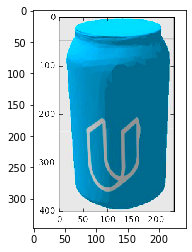

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read in and plot the image
image = mpimg.imread('Udacican.jpeg')
plt.imshow(image)

In [2]:
# Take histograms in R, G, and B
r_hist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
g_hist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
b_hist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

In [3]:
# Generating bin centers
bin_edges = r_hist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

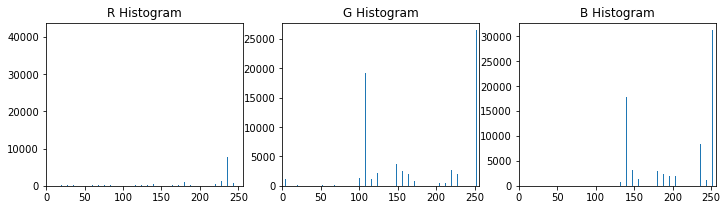

In [4]:
# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, r_hist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, g_hist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, b_hist[0])
plt.xlim(0, 256)
plt.title('B Histogram')
plt.show()

In [5]:
hist_features = np.concatenate((r_hist[0], g_hist[0], b_hist[0])).astype(np.float64)

In [6]:
norm_features = hist_features / np.sum(hist_features)

## Quiz - Define a function to compute color histogram features
color histogram.py


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image
image = mpimg.imread('Udacican.jpeg')
# Your other options for input images are:
    # hammer.jpeg
    # beer.jpeg
    # bowl.jpeg
    # create.jpeg
    # disk_part.jpeg
    
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    # Compute the histogram of the HSV channels separately
    # Concatenate the histograms into a single feature vector
    # Normalize the result
    # Return the feature vector
    norm_features = None
    return norm_features
    
feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('HSV Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
else:
    print('Your function is returning None...')

Your function is returning None...


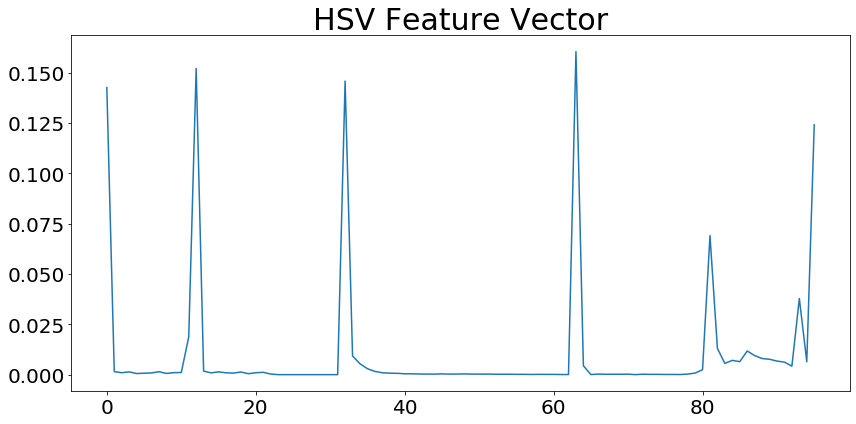

In [8]:
## trial aman \
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image
image = mpimg.imread('Udacican.jpeg')
# Your other options for input images are:
    # hammer.jpeg
    # beer.jpeg
    # bowl.jpeg
    # create.jpeg
    # disk_part.jpeg
    
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    # Compute the histogram of the HSV channels separately
    # Concatenate the histograms into a single feature vector
    # Normalize the result
    # Return the feature vector
    image = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    h_hist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
    s_hist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
    v_hist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
    hist_features = np.concatenate((h_hist[0], s_hist[0], v_hist[0])).astype(np.float64)
    norm_features = hist_features / np.sum(hist_features)
    return norm_features
    
feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('HSV Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
else:
    print('Your function is returning None...')

In [9]:
# solution to the problem
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Compute the histogram of the HSV channels separately
    h_hist = np.histogram(hsv_img[:,:,0], bins=nbins, range=bins_range)
    s_hist = np.histogram(hsv_img[:,:,1], bins=nbins, range=bins_range)
    v_hist = np.histogram(hsv_img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((h_hist[0], s_hist[0], v_hist[0])).astype(np.float64)
    # Normalize the result
    norm_features = hist_features / np.sum(hist_features)
    # Return the feature vector
    return norm_features
    

## Support Vector Machine


In [10]:
import numpy as np

# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(100, 500), x_mult=(2, 7), y_mult=(2, 7), 
                             x_off=(0, 50), y_off=(0, 50)):

    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the y-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction

    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    labels = []
    # Generate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)

    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):

        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
        labels.append(np.zeros_like(xpts) + idx)

    # Return cluster positions and labels
    return clusters_x, clusters_y, labels

Text(0.5, 1.0, 'SVC with linear kernel')

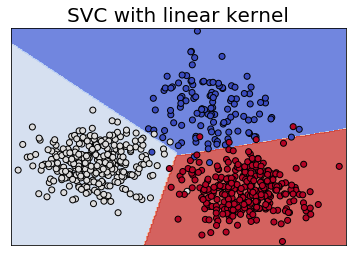

In [12]:
## Quiz svm.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# from generate_clusters import cluster_gen

np.random.seed(424) # Change the number to generate a different cluster.

n_clusters = 3
clusters_x, clusters_y, labels = cluster_gen(n_clusters)

# Convert to a training dataset in sklearn format
X = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
y = np.float32((np.concatenate(labels)))

# Create an instance of SVM and fit the data.
ker = 'linear'
svc = svm.SVC(kernel=ker).fit(X, y)

# Create a mesh that we will use to colorfully plot the decision surface
# Plotting Routine courtesy of: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# Note: this coloring scheme breaks down at > 7 clusters or so

h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # -1 and +1 to add some margins
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify each block of the mesh (used to assign its color)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with '+ker+' kernel', fontsize=20)